In [140]:
import numpy as np
import matplotlib.pyplot as plt
# import libr.ising as isi
# import libr.gaubc as bc
import scipy.stats as stats
from scipy.optimize import minimize
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size']=11

# 2 cells, K stimuli - simple

In [6]:
C = 20 # number of stimuli
N = 2 # number of cells

# possible masks (for binary op) and words
words = np.array([[0,0],[0,1],[1,0],[1,1]])
# count spikes in each word
nk = np.sum(words,1)

In [45]:
powers = np.array([2**i for i in range(N)])
def spikes_to_int(spikes):
    return np.sum(powers[spikes.astype(bool)])

def xCx(words,C): # calculate x.T C x for all words
    return np.einsum('ij,ij->i', (words@C), words)

# compute probabilities for each word
def pro(h,   # input quality
        h0,  # penalization for spikes
        tun, # input tuning
        cor): # correlation
    # compute energy for each word
    probs = np.exp(h*(words@tun).T + np.array([0,0,0,cor] - np.array([0,h0,h0,2*h0]))) # exp of energy
    # normalize to sum to 1
    probs = (probs.T / (np.sum(probs,1))).T 
    return probs

def spatinfo_theor(probs): # assume flat prior
    # compute P(x) = sum_s P(x|s)P(s)
    prall = np.mean(probs,0)
    # compute P(x|s)log(P(x|s)/P(x)) for all x,s
    prrat = probs * np.log2(probs/prall)
    # sum_s P(s) sum_x P(x|s)log(P(x|s)/P(x))
    return np.sum(prrat) / len(x_c)

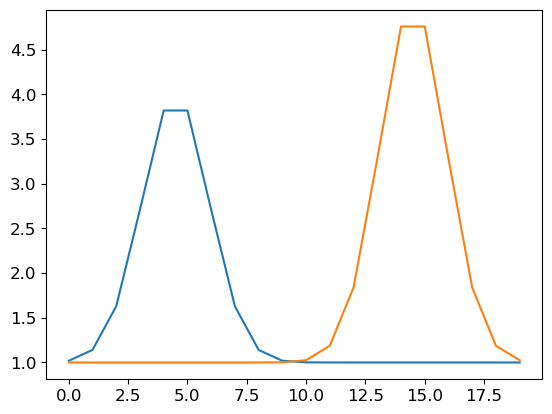

In [82]:
# centers, indexes
x_c = np.arange(C)+0.5
Nx = len(x_c)

def tuning1D(x,cent,width,gain,bias=0):
    return bias + gain*np.exp(-((x - cent)/width)**2)

plt.plot(tuning1D(x_c,5,2,gain=3,bias=1))
plt.plot(tuning1D(x_c,15,2,gain=4,bias=1))
# plt.ylim([0,2.5])


In [77]:
# cell tuning - look at place fields that are furhter and further away
cent = (9.5,10.5)
# for cent in [(5,15),(6,14),(7,13),(8,12),(9,11)]:
#     print('*',end='')
#     # gaussian and tuning similarity
tuning = np.array([tuning1D(x_c,c,1,0) for c in cent])
# tuns.append(tuning)
# tunsim = np.corrcoef(tuning)[0,1]

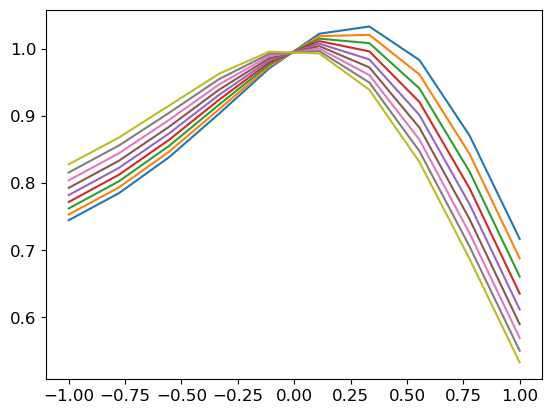

In [78]:
for h in np.arange(1,10)/10:
    plt.plot(np.linspace(-1,1,10),[spatinfo_theor(pro(h,0,tuning,c))/spatinfo_theor(pro(h,0,tuning,0)) for c in np.linspace(-2,2,10)])
    

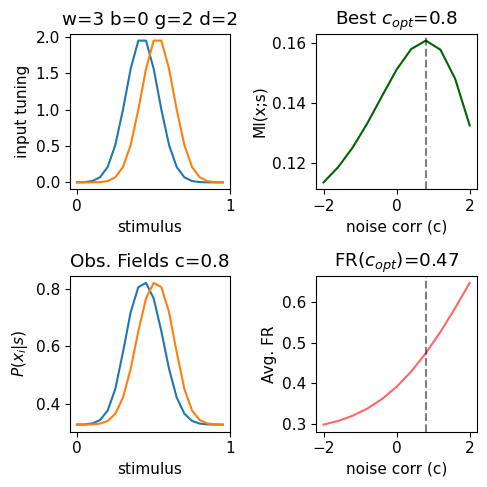

In [154]:
# for each choice of input tuning width, bias, gain
# plot MI for choices of c \in (-1,1), and peak
# and plot the output firing rate
# also plot the marginal (i.e. effective tuning fields) for c giving max MI

width = 3
bias = 0
gain = 2
dist = 2

penalz = 1

pox_c = np.linspace(-2,2,11)

# plot, for each h:
# tuning, effective place fields
plt.figure(figsize=(5,5))
tun=np.array([tuning1D(x_c,10+i*dist/2,width=width,gain=gain,bias=bias) for i in [-1,1]])

# plot tuning
plt.subplot(2,2,1)
plt.plot(tun.T)
# plt.yticks([])
plt.xticks([0,20],[0,1])
plt.ylabel('input tuning')
plt.xlabel('stimulus')
# as title, puth width, bias, gain, and distance
plt.title('w='+str(width)+' b='+str(bias)+' g='+str(gain)+' d='+str(dist))

# plot MI for various choices of c
plt.subplot(2,2,2)
MIs = [spatinfo_theor(pro(1,penalz,tun,c)) for c in pox_c]
plt.plot(pox_c,MIs,color='darkgreen')
best_c = pox_c[np.argmax(MIs)]
# as title use optimal c
plt.title('Best $c_{opt}$='+str(np.round(best_c,2)))
plt.axvline(x = best_c,color='k',alpha=0.5,ls='--')
plt.xlabel('noise corr (c)')
plt.ylabel('MI(x;s)')

# plot total resulting fields
plt.subplot(2,2,3)
plt.plot(pro(1,penalz,tun,best_c)@words)
plt.title('Obs. Fields c='+str(np.round(best_c,2)))
plt.xticks([0,20],[0,1])
plt.xlabel('stimulus')
plt.ylabel(r'$P(x_i | s)$')

plt.subplot(2,2,4)
avg_f = [np.mean(pro(1,penalz,tun,c)@words) for c in pox_c]
plt.plot(pox_c,avg_f,color='red',alpha=0.6,label='Tot. Fir')
plt.ylabel('Avg. FR')
plt.xlabel('noise corr (c)')
# as title, put avg fir for optimal c
plt.title('FR($c_{opt}$)='+str(np.round(avg_f[np.argmax(MIs)],2)))
plt.axvline(x = best_c,color='k',alpha=0.5,ls='--')

plt.tight_layout()


# 2 cells, 20 bins

In [ ]:
# 2 cells, linear
C = 20 # number of bins
N = 2 # number of cells

# possible masks (for binary op) and words
masks = [1 << i for i in range(N)]
words = np.array([isi.spikes(i,masks) for i in range(2**N)]) #  0, 1
# count spikes in each word
nk = np.sum(words,1)

# centers, indexes
x_c = np.arange(C)+0.5
Nx = len(x_c)

In [ ]:
def tuning1D(x,cent,sig,bias=0):
    return bias + np.exp(-((x - cent)/sig)**2)

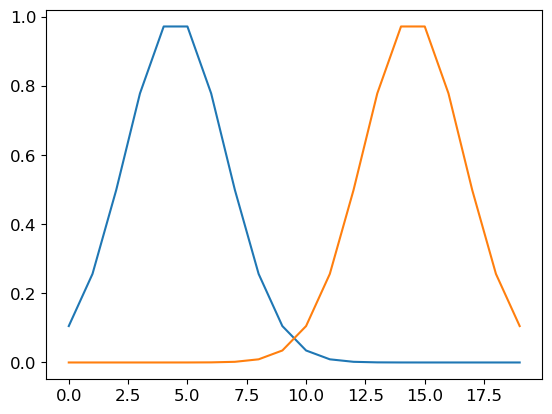

In [ ]:
plt.plot(tuning1D(x_c,5,3))
plt.plot(tuning1D(x_c,15,3))


In [ ]:
powers = np.array([2**i for i in range(N)])
def spikes_to_int(spikes):
    return np.sum(powers[spikes.astype(bool)])

def xCx(words,C):
    return np.einsum('ij,ij->i', (words@C), words)

def pro(h,pp,J,conn,h0,nk):
    probs = np.exp(h*pp + J*conn - h0*nk) # exp of energy
    probs = (probs.T / (np.sum(probs,1))).T # normalize to 1
    return probs

def spatinfo_theor(probs):
    prall = np.mean(probs,0)
    prrat = probs * np.log2(probs/prall)
    return np.sum(prrat) / len(x_c)
def marg(probs):
    f1=(probs@words).T # can get this from fr above
    f0=1-f1 # easy
    pr = np.zeros([len(words),C**2]) # need something smart here
    for iw,w in enumerate(words):
        pr[iw] = np.prod(f1[w==1],0)*np.prod(f0[w==0],0)
    return pr.T

In [ ]:
# constraints
const_fr = 1
bou = [(-1,1)] + [(-10,10)]

# initialize connection matrix
Cor = np.zeros([N,N])
indtriu=np.triu_indices(N,1)

# J is fixed to 1 
J = 1

# - mutual info
def obj(flatC,h,pp):
    # function to minimize
    Cor[indtriu]=flatC[:-1]
    h0=flatC[-1]
    conn = xCx(words,Cor)
    probs = pro(h,pp,1,conn,h0,nk)
    return -spatinfo_theor(probs)

# constrain: firing rate
def cons(flatC,h,pp):
    Cor[indtriu]=flatC[:-1]
    h0=flatC[-1]
    conn = xCx(words,Cor)
    probs = pro(h,pp,1,conn,h0,nk)
    return const_fr - np.mean(probs@words)*N

In [ ]:
pos_hs=np.array([2,4,6,8,10,12])
ress = {i:[] for i in pos_hs}
tuns = []

# cell tuning - look at place fields that are furhter and further away
for cent in [(5,15),(6,14),(7,13),(8,12),(9,11)]:
    print('*',end='')
    # gaussian and tuning similarity
    tuning = np.array([tuning1D(x_c,c,4) for c in cent])
    tuns.append(tuning)
    tunsim = np.corrcoef(tuning)[0,1]
    # place tuning
    pp = tuning.T @ words.T

    for h in pos_hs:
        res = minimize(obj, np.zeros(2), 
               method='SLSQP', constraints={'type': 'eq', 'fun': cons, 'args':(h,pp)},bounds=bou,args=(h,pp),
              options={'maxiter': 10000, 'ftol': 1e-05, 'eps': 1.4901161193847656e-07})
        ress[h].append(res)

*****

/tmp/ipykernel_171589/1195425824.py:41: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


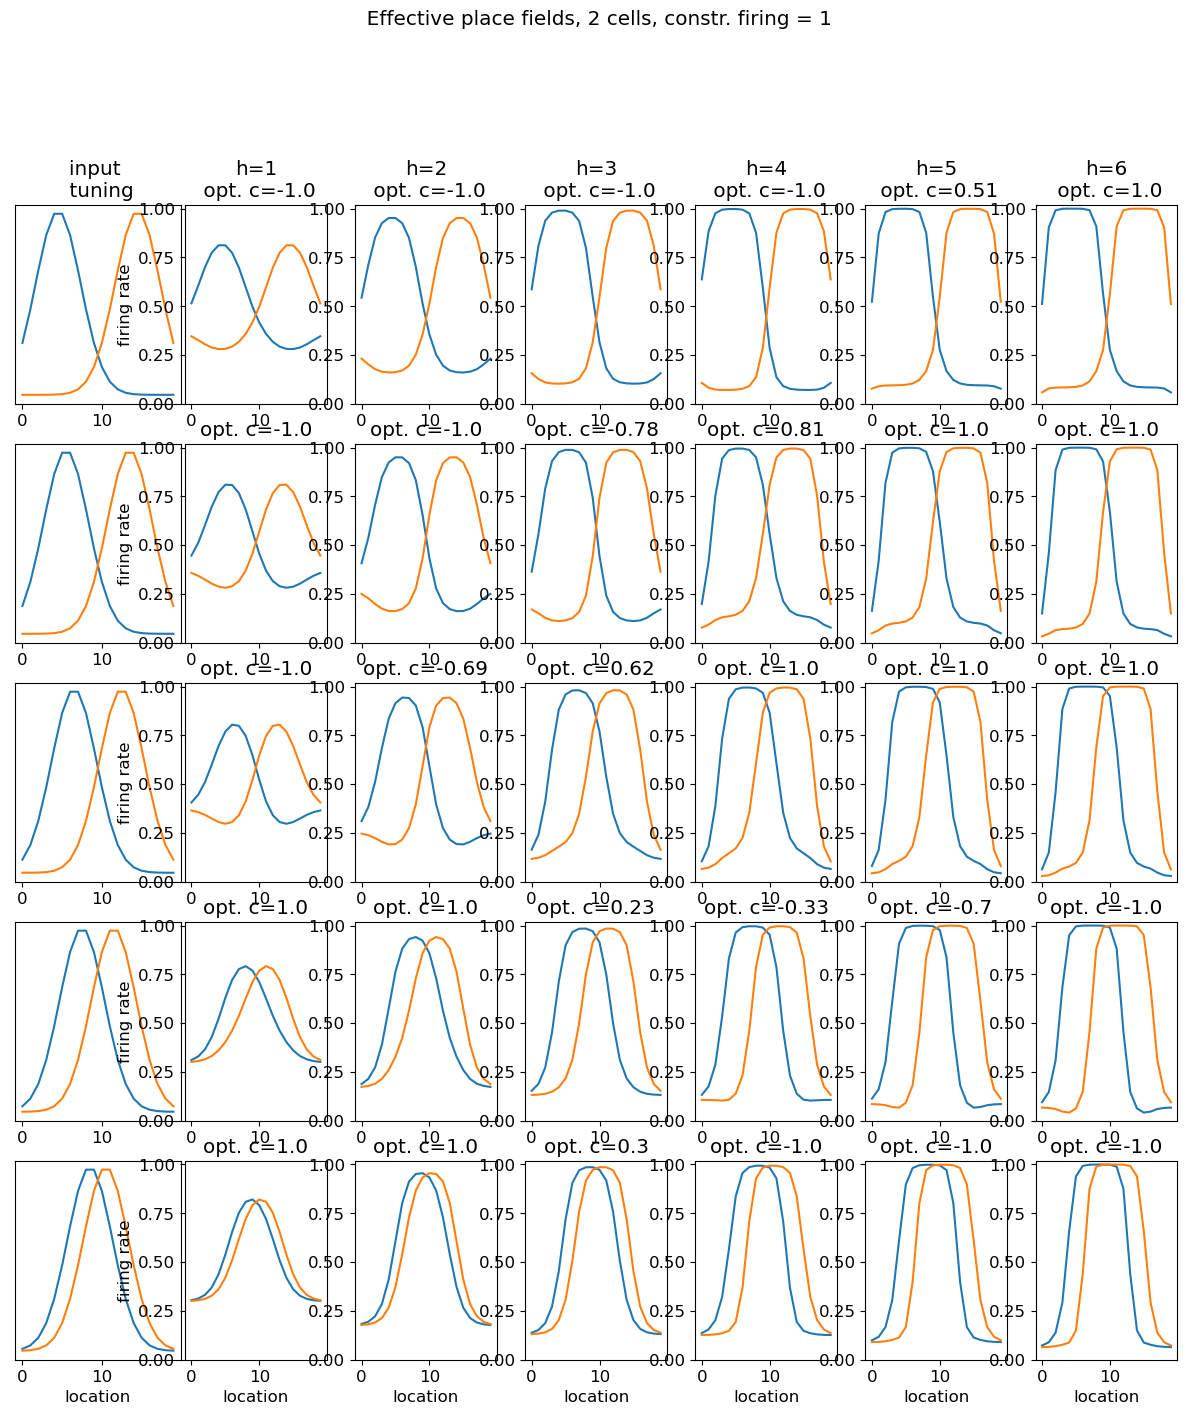

In [ ]:
# plot, for each h:
# tuning, effective place fields
plt.figure(figsize=(15,15))
Cs = np.zeros([len(pos_hs),len(ress[pos_hs[0]])])
for ires, res in enumerate(ress[2]): # tuning
    tuning=tuns[ires]
    plt.subplot(5,6,1+ires*6)
    plt.plot(tuning.T)
    plt.yticks([])
    if ires == 0:
        plt.title('input \n tuning')
    if ires == 4:
        plt.xlabel('location')

for ih,h in enumerate(pos_hs):        
    for ires, res in enumerate(ress[h]):
        
        Cor[indtriu]=res.x[:-1]
        h0=res.x[-1]
        conn = xCx(words,Cor)
        tuning=tuns[ires]
        pp = tuning.T @ words.T
        conn = xCx(words,Cor)
        probs = pro(h,pp,J,conn,h0,nk)
        fr=probs@words
        
        plt.subplot(5,7,1+int(h/2)+ires*7)
        
        plt.plot(fr)
        plt.ylim([0,1.02])
        if ires == 0:
            plt.title('h='+str(int(h/2)) + '\n opt. c='+str(np.round(res.x[0],2)))
        else:
            plt.title('opt. c='+str(np.round(res.x[0],2)))
        Cs[ih,ires]=res.x[0]
        if h == pos_hs[0]:
            plt.ylabel('firing rate')
        if ires == 4:
            plt.xlabel('location')
    plt.suptitle('       Effective place fields, 2 cells, constr. firing = 1',y=1.01)
    plt.tight_layout()
# plt.savefig('../crist/New_Figs/SI Figs/Effective_Place_Fields_fir1.pdf')

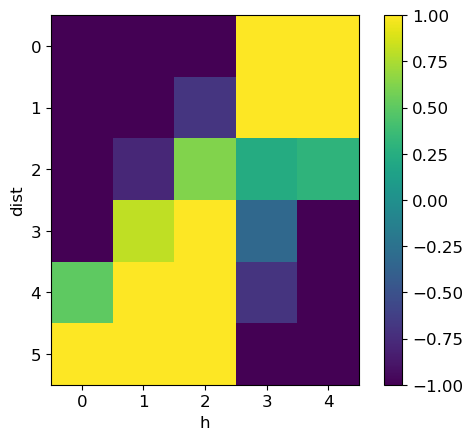

In [ ]:
plt.imshow(Cs)
plt.xlabel('h')
plt.ylabel('dist')
plt.colorbar()

In [ ]:
# plot, for each h:
# tuning, effective place fields
plt.figure(figsize=(10,10))
for ires, res in enumerate(ress[2]): # tuning
    tuning=tuns[ires]
    plt.subplot(5,6,1+ires*6)
    plt.plot(tuning.T)
    plt.yticks([])
    if ires == 0:
        plt.title('input \n tuning')
    if ires == 4:
        plt.xlabel('location')

for h in pos_hs[0:5]:        
    for ires, res in enumerate(ress[h]):
        
        Cor[indtriu]=res.x[:-1]
        h0=res.x[-1]
        conn = xCx(words,Cor)
        tuning=tuns[ires]
        pp = tuning.T @ words.T
        conn = xCx(words,Cor)
        probs = pro(h,pp,J,conn,h0,nk)
        fr=probs@words
        
        plt.subplot(5,6,1+int(h/2)+ires*6)
        
        plt.plot(fr)
        plt.ylim([0,1.02])
        if ires == 0:
            plt.title('h='+str(int(h/2)) + '\n opt. c='+str(np.round(res.x[0],2)))
        else:
            plt.title('opt. c='+str(np.round(res.x[0],2)))
        if h == pos_hs[0]:
            plt.ylabel('firing rate')
        if ires == 4:
            plt.xlabel('location')
    plt.suptitle('       Effective place fields, 2 cells, constr. firing = 1',y=1.01)
    plt.tight_layout()
plt.savefig('../crist/New_Figs/SI Figs/Effective_Place_Fields_fir1.pdf')

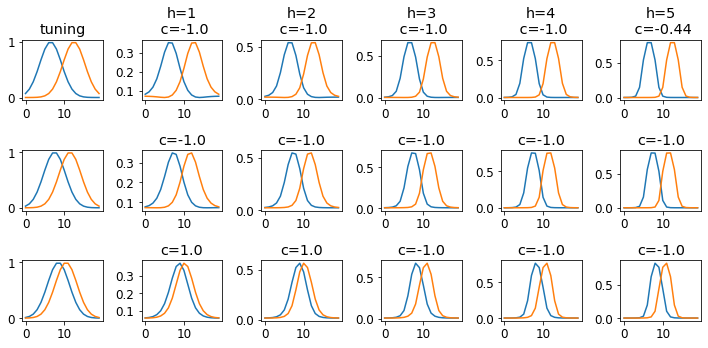

In [ ]:
# plot, for each h:
# tuning, effective place fields
plt.figure(figsize=(10,5))
for ires, res in enumerate(ress[2][2:]): # tuning
    tuning=tuns[2+ires]
    plt.subplot(3,6,1+ires*6)
    plt.plot(tuning.T)
    if ires == 0:
        plt.title('tuning')

for h in pos_hs[0:5]:        
    for ires, res in enumerate(ress[h][2:]):
        
        Cor[indtriu]=res.x[:-1]
        h0=res.x[-1]
        conn = xCx(words,Cor)
        tuning=tuns[2+ires]
        pp = tuning.T @ words.T
        conn = xCx(words,Cor)
        probs = pro(h,pp,J,conn,h0,nk)
        fr=probs@words
        
        plt.subplot(3,6,1+int(h/2)+ires*6)
        
        plt.plot(fr)
        if ires == 0:
            plt.title('h='+str(int(h/2)) + '\n c='+str(np.round(res.x[0],2)))
        else:
            plt.title('c='+str(np.round(res.x[0],2)))
        
    plt.tight_layout()

In [ ]:
a = np.zeros([10,10])

for k1 in range(10):
    for k2 in range(10):
        a[k1,k2] = k1*(k1+1)/2 + k2*(k2+1)/2 - k1*k2

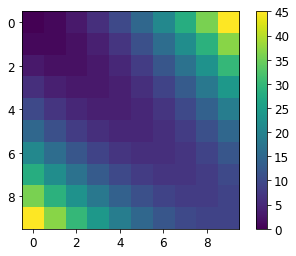

In [ ]:
plt.imshow(a)
plt.colorbar()